In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Read in Data

In [ ]:
df = pd.read_csv('train.csv', index_col='Id')
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60.0,RL,65.0,8450.0,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.0,5.0,2003.0,2003.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,Gd,8.0,Typ,0.0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0.0,61.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,2.0,2008.0,WD,Normal,208500.0
2,20.0,RL,80.0,9600.0,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6.0,8.0,1976.0,1976.0,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,TA,6.0,Typ,1.0,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,5.0,2007.0,WD,Normal,181500.0
3,60.0,RL,68.0,11250.0,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.0,5.0,2001.0,2002.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,Gd,6.0,Typ,1.0,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0.0,42.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,9.0,2008.0,WD,Normal,223500.0
4,70.0,RL,60.0,9550.0,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7.0,5.0,1915.0,1970.0,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,Gd,7.0,Typ,1.0,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0.0,35.0,272.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,2.0,2006.0,WD,Abnorml,140000.0
5,60.0,RL,84.0,14260.0,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8.0,5.0,2000.0,2000.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,Gd,9.0,Typ,1.0,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192.0,84.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,12.0,2008.0,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60.0,RL,62.0,7917.0,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6.0,5.0,1999.0,2000.0,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,953.0,953.0,GasA,Ex,Y,SBrkr,953.0,694.0,0.0,1647.0,0.0,0.0,2.0,1.0,3.0,1.0,TA,7.0,Typ,1.0,TA,Attchd,1999.0,RFn,2.0,460.0,TA,TA,Y,0.0,40.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,8.0,2007.0,WD,Normal,175000.0
1457,20.0,RL,85.0,13175.0,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6.0,6.0,1978.0,1988.0,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790.0,Rec,163.0,589.0,1542.0,GasA,TA,Y,SBrkr,2073.0,0.0,0.0,2073.0,1.0,0.0,2.0,0.0,3.0,1.0,TA,7.0,Min1,2.0,TA,Attchd,1978.0,Unf,2.0,500.0,TA,TA,Y,349.0,0.0,0.0,0.0,0.0,0.0,NaN,MnPrv,NaN,0.0,2.0,2010.0,WD,Normal,2

#Visualizations

##Sales Price vs Time Sold

Text(0.5, 1.0, 'Home Prices vs Year Sold')

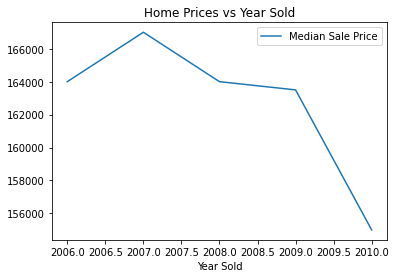

In [ ]:
years_med = df[['YrSold', 'SalePrice']].groupby(by='YrSold').median()

plt.plot(years_med, label='Median Sale Price')
plt.xlabel('Year Sold')
plt.legend()
plt.title('Home Prices vs Year Sold')

Text(0.5, 1.0, 'Home Prices vs Month Sold')

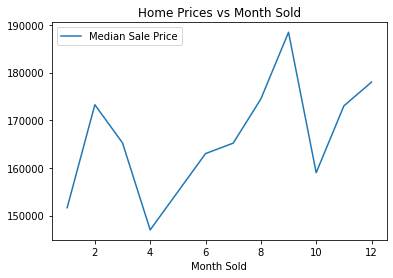

In [ ]:
mo_med = df[['MoSold', 'SalePrice']].groupby(by='MoSold').median()

plt.plot(mo_med, label='Median Sale Price')
plt.xlabel('Month Sold')
plt.legend()
plt.title('Home Prices vs Month Sold')

##Sales Price vs Year Built

Let's drop the one major outlier in year built

In [ ]:
vis_df = df.drop(df.loc[df['YearBuilt'] == 200].index)
vis_df['YearBuilt'].min()

1872.0

Text(0.5, 1.0, 'Home Prices vs Year Built')

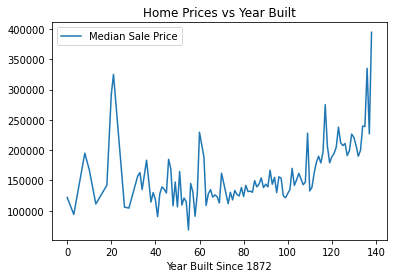

In [ ]:
vis_df['YearBuiltSince'] = vis_df['YearBuilt'] - 1872
years_med = vis_df[['YearBuiltSince', 'SalePrice']].groupby(by='YearBuiltSince').median()

plt.plot(years_med, label='Median Sale Price')
plt.xlabel('Year Built Since 1872')
plt.legend()
plt.title('Home Prices vs Year Built')

##Sales Price vs Overall Quality


Drop the major outlier in sale price

In [ ]:
vis_df = df.drop(df.loc[df['SalePrice'] == 10000000].index)

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Home Prices vs Calculated Quality')

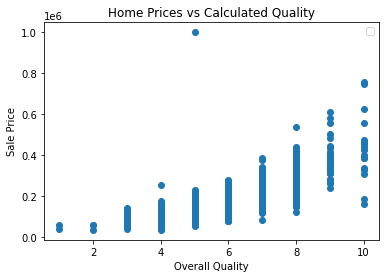

In [ ]:
plt.scatter(vis_df['OverallQual'], vis_df['SalePrice'])
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.legend()
plt.title('Home Prices vs Calculated Quality')

##Sale Price Distribution

Hard to tell anything with the outlier distorting data, let's remove it.

Text(0.5, 1.0, 'Number of Homes Sold Per Price Point')

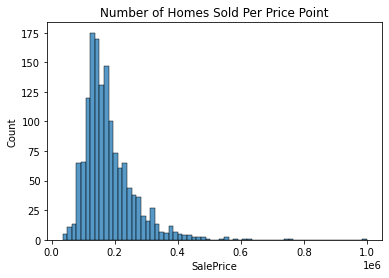

In [ ]:
import seaborn as sns

vis_df = df.drop(df.loc[df['SalePrice'] == 10000000].index)

sns.histplot(vis_df['SalePrice'])
plt.title('Number of Homes Sold Per Price Point')

This looks like a lognormal distribution.

Text(0.5, 1.0, 'Number of Homes Sold Per Price Point, Log')

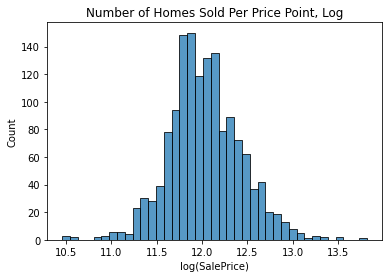

In [ ]:
sns.histplot(np.log(vis_df['SalePrice'].values))
plt.xlabel('log(SalePrice)')
plt.title('Number of Homes Sold Per Price Point, Log')

We can confirm that it's a lognormal distribution by graphing log(SalePrice) and seeing it is now a normal distribution.

#Evaluating Neighborhood Value

Assuming we can't just use the average Sale Price when evaluating neighborhood value and that neighborhood value can be approximated with sale price.

In [ ]:
df.select_dtypes(include='object').columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

What features are most correlated with high-price neighborhoods?

In [ ]:
one_hot_df = df.copy()
for col in df.select_dtypes(include='object').columns:
  one_hot_df = one_hot_df.join(pd.get_dummies(one_hot_df[col], prefix=col, drop_first=True))
  one_hot_df = one_hot_df.drop(col, axis=1)

one_hot_df['Neighborhood'] = df['Neighborhood']
neighborhoods = one_hot_df.groupby(by='Neighborhood').median()
neighborhoods['NumListings'] = one_hot_df.groupby(by='Neighborhood').count()['SalePrice']
neighborhood_corr = neighborhoods.corrwith(neighborhoods['SalePrice'])
print(neighborhood_corr.sort_values(ascending=False)[0:20])
print(neighborhood_corr.sort_values(ascending=True)[0:20])

SalePrice           1.000000
GarageArea          0.899158
OverallQual         0.881835
TotalBsmtSF         0.870533
GarageCars          0.850571
GrLivArea           0.840739
1stFlrSF            0.825690
OpenPorchSF         0.802265
YearRemodAdd        0.760961
ExterQual_Gd        0.755791
Foundation_PConc    0.713367
WoodDeckSF          0.662915
TotRmsAbvGrd        0.655884
GarageYrBlt         0.647247
YearBuilt           0.639634
BsmtFinType1_GLQ    0.636181
LotFrontage         0.628216
Fireplaces          0.624934
FullBath            0.621766
BsmtFinSF1          0.617772
dtype: float64
KitchenQual_TA         -0.807640
ExterQual_TA           -0.755791
MSZoning_RM            -0.603031
GarageFinish_Unf       -0.589074
BsmtQual_TA            -0.558165
LotShape_Reg           -0.547716
BsmtExposure_No        -0.532592
Foundation_CBlock      -0.519134
GarageType_Detchd      -0.491128
MasVnrType_None        -0.483700
HeatingQC_TA           -0.417504
LotConfig_Inside       -0.412647
OverallCo

If you wanted to tell how nice a neighborhood is and don't have access to the historical sales prices, checking from the presence or absence of these features would be a good way to approximate it.

#Data Modeling

##Data Cleaning


In [ ]:
one_hot_df = df.copy()
for col in df.select_dtypes(include='object').columns:
  one_hot_df = one_hot_df.join(pd.get_dummies(one_hot_df[col], prefix=col, drop_first=True))
  one_hot_df = one_hot_df.drop(col, axis=1)

Need to clear the NaNs

In [ ]:
one_hot_df.isna().sum().sort_values(ascending=False)[0:10]

LotFrontage     261
GarageYrBlt      83
MasVnrArea       10
BedroomAbvGr      4
HalfBath          4
FullBath          4
BsmtHalfBath      4
BsmtFullBath      4
KitchenAbvGr      3
GarageArea        2
dtype: int64

Let's assume the garage year built is the same of the house year built.

In [ ]:
one_hot_df['GarageYrBlt'] = one_hot_df['GarageYrBlt'].fillna(one_hot_df['YearBuilt'])

Fill the rest of the missing values in with the mean for that column

In [ ]:
for col in one_hot_df.columns:
  mean_val = one_hot_df[col].mean()
  one_hot_df[col] = one_hot_df[col].fillna(mean_val)

In [ ]:
one_hot_df.isna().sum().sort_values(ascending=False)[0:10]

SaleCondition_Partial    0
Condition2_PosA          0
Condition2_Feedr         0
Condition1_RRNn          0
Condition1_RRNe          0
Condition1_RRAn          0
Condition1_RRAe          0
Condition1_PosN          0
Condition1_PosA          0
Condition1_Norm          0
dtype: int64

## Feature Selection

These are the most significant features to train our models on, based on mutual information.

In [ ]:
from sklearn.feature_selection import mutual_info_regression

X = one_hot_df.drop('SalePrice', axis=1)
y = one_hot_df['SalePrice']

feature_importance = pd.DataFrame({'Name': X.columns, 'Mutual Information': mutual_info_regression(X, y)})
chosen_features = feature_importance.sort_values(by='Mutual Information', ascending=False)[:20]
feature_names = chosen_features['Name'].values
chosen_features

,Name,Mutual Information
3,OverallQual,0.563636
15,GrLivArea,0.507144
26,GarageArea,0.426723
11,TotalBsmtSF,0.407666
25,GarageCars,0.360931
5,YearBuilt,0.350761
12,1stFlrSF,0.341629
24,GarageYrBlt,0.281223
0,MSSubClass,0.273990
6,YearRemodAdd,0.268916


Need to scale the features

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(
    scaler.fit_transform(X[feature_names]),
    scaler.fit_transform(y.values.reshape(-1, 1)).ravel(),
    test_size=0.33)

##Model Training

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import math

model_params = (
    (KNeighborsRegressor(),
     {'n_neighbors': range(2, 11, 2),
      'weights': ('uniform', 'distance')}),
    (DecisionTreeRegressor(),
     {'max_depth': (None, 5, 10, 20)}),
    (LinearRegression(), {}),
    (RandomForestRegressor(),
     {'n_estimators': range(20, 500, 50),
      'max_depth': (None, 5, 10, 20)}
     ),
    (MLPRegressor(),
     {'activation': ('logistic', 'relu'),
      'alpha': (.0001, .00001, .001),
      'solver': ('sgd', 'adam'),
      'hidden_layer_sizes': ((100), (50, 50, 50), (5, 3), (3))})
)

for model, params in model_params:
  gscv = GridSearchCV(model, params).fit(X_train, y_train)
  prediction = gscv.predict((X_test))
  print(model)
  print('R2 Score', r2_score(y_test, prediction))
  print('RMSE', math.sqrt(mean_squared_error(y_test, prediction)))
  print('Best Params', gscv.best_params_)
  print('===========================================================================')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')
R2 Score -1.1136638630359075
RMSE 0.4678428984549348
Best Params {'n_neighbors': 4, 'weights': 'distance'}
DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
R2 Score -53.98622474649786
RMSE 2.3862120350751717
Best Params {'max_depth': 5}
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2 Score 0.42988840387854677
RMSE 0.24297523883904817
Best Params {}
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
        

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)
R2 Score 0.6006580670376092
RMSE 0.2033548516261144
Best Params {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'solver': 'adam'}


The best model was a simple feed-forward neural network, not surprising considering how it is the most complex.

There is still lots of room for improvement. These are only 5 models, there are dozens more than may perform better, and even on these there are still more hyperparameters to tune.

In addition to model selection, there is still more that can be done for feature selection. I chose my features based on mutual information, but that is only one possible metric. You could even create your own features with PCA or by combining or transforming existing columns.

#Running on the Test Dataset


In [ ]:
test_df = pd.read_csv('test.csv', index_col='Id')
for col in test_df.select_dtypes(include='object').columns:
  test_df = test_df.join(pd.get_dummies(test_df[col], prefix=col, drop_first=True))
  test_df = test_df.drop(col, axis=1)

test_df['GarageYrBlt'] = test_df['GarageYrBlt'].fillna(test_df['YearBuilt'])

for col in test_df.columns:
  mean_val = test_df[col].mean()
  test_df[col] = test_df[col].fillna(mean_val)

X_test = scaler.fit_transform(test_df[feature_names])

Retrain on the entire train set

In [ ]:
X_train = one_hot_df.drop('SalePrice', axis=1)
y_train = one_hot_df['SalePrice']

X_train = scaler.fit_transform(X[feature_names])
y_train = scaler.fit_transform(y.values.reshape(1, -1)).ravel()

model = MLPRegressor(activation='logistic', alpha=.0001, hidden_layer_sizes=(50, 50, 50), solver='adam')

model.fit(X_train, y_train)
predictions = pd.Series(model.predict(X_test))
predictions.index = test_df.index
predictions.sort_values(ascending=False)[0:10]

Id
2716    0.008381
2601    0.003425
1860    0.003386
1891    0.002454
2865    0.002454
2551    0.002291
2072    0.002291
1564    0.002268
2482    0.002252
2245    0.002198
dtype: float64

These are most likely the most expensive houses in the test set.